In [1]:
## system package
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os, sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="4"  # specify which GPU(s) to be used
sys.path.append('../')
sys.path.append('../model')
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fold = 1
mode = "curriculum_easy_60idx"
cyclic_lr = np.load("cyclic_lr.npy")
df_train_loss = pd.read_csv(f"../Step4_Training/runs/train_sample_loss_{fold}_{mode}.csv")
df_train_loss_only = df_train_loss.iloc[:,1:].to_numpy()
df_train_idx = df_train_loss.iloc[:,0].to_numpy()
df_train_idx.shape

(7405,)

In [3]:
normalized_loss = df_train_loss_only - df_train_loss_only.mean(0)

In [4]:
normalized_loss_mean = normalized_loss.mean(1)

In [5]:
ranked_loss = np.stack([df_train_idx, normalized_loss_mean],1)
ranked_loss = np.concatenate([ranked_loss, normalized_loss], 1) #(N, imageidx + mean_loss + loss in each epoch)
ranked_loss = ranked_loss[np.argsort(ranked_loss[:,1])[::-1], :]
ranked_img_index = ranked_loss[:,0]

In [6]:
np.save(f"../Step4_Training/runs/train_ranked_sample_loss_{fold}_{mode}.npy", ranked_loss)

### Plot for visualization

In [7]:
ranked_loss_plot = ranked_loss[:, 2:]
plotrange = [0, 0.2, 0.4, 0.6, 1]
_, epochs = ranked_loss_plot.shape
x = list(range(epochs))

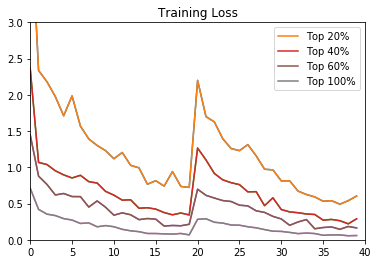

In [8]:
for i in range(1, len(plotrange)):
    start, end = int(plotrange[i-1] * len(ranked_loss_plot)), int(plotrange[i] * len(ranked_loss_plot))
    y = ranked_loss_plot[start:end].std(0)
    plt.plot(x, y)
    plt.xlim([0, 40])
    plt.ylim([0,3])
    plt.plot(x, y, label='Top {0:.0%}'.format(plotrange[i]))
    plt.legend(loc = 'upper right')
    plt.title("Training Loss")